TOPIC MODELLING

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import re
df = pd.read_csv(r"C:\Users\HP\__new_processed_tweet_data.csv")

In [14]:
df

,created_at,clean_tweets,statuses_count,source,language,followers_count,friends_count,favourite_count,retweet_count,subjectivity,polarity
0,Sun Aug 07 22:31:20 +0000 2022,Extra random image (I): Lets focus in one very...,8097,"<a href=""http://twitter.com/download/android"" ...",en,20497,2621,15760,2,0.190625,-1.250000e-01
1,Sun Aug 07 22:31:16 +0000 2022,China's media explains the military reasons fo...,5831,"<a href=""http://twitter.com/download/android"" ...",en,65,272,6967,201,0.100000,-1.000000e-01
2,Sun Aug 07 22:31:07 +0000 2022,"China even cut off communication, they don't a...",1627,"<a href=""http://twitter.com/download/android"" ...",en,85,392,2166,0,0.000000,0.000000e+00
3,Sun Aug 07 22:31:06 +0000 2022,"Putin to XiJinping : I told you my friend, Tai...",1627,"<a href=""http://twitter.com/download/android"" ...",en,85,392,2166,0,0.350000,1.000000e-01
4,Sun Aug 07 22:31:04 +0000 2022,"I’m sorry, I thought Taiwan was an independent...",18958,"<a href=""http://twitter.com/download/iphone"" r...",en,910,2608,17247,381,0.556250,-6.938894e-18
...,...,...,...,...,...,...,...,...,...,...,...
21995,Sat Aug 06 18:03:29 +0000 2022,A good infographic of China's missile launches...,6600,"<a href=""http://twitter.com/download/android"" ...",en,62,471,9683,183,0.600000,7.000000e-01
21996,Sat Aug 06 18:03:27 +0000 2022,A good infographic of China's missile launches...,3739,"<a href=""http://twitter.com/download/android"" ...",en,94,1751,11538,183,0.600000,7.000000e-01
21997,Sat Aug 06 18:03:27 +0000 2022,Thanks Pelosi smart move.,3540,"<a href=""http://twitter.com/download/android"" ...",en,88,0,1940,0,0.421429,2.071429e-01
21998,Sat Aug 06 18:03:26 +0000 2022,Taiwan people's Desire for Unification With Ch...,21833,"<a href=""http://twitter.com/download/android"" ...",en,537,317,11849,67,0.350000,5.000000e-02


In [15]:
class PrepareData:
    def __init__(self,df):
        self.df=df
    
    def preprocess_data(self):
        df = self.df.loc[self.df['language'] =="en"]

    
        #text Preprocessing
        df['clean_tweets']=df['clean_tweets'].astype(str)
        df['clean_tweets'] = df['clean_tweets'].apply(lambda x: x.lower())
        df['clean_tweets']= df['clean_tweets'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

        #Converting tweets to list of words For feature engineering
        sentence_list = [tweet for tweet in df['clean_tweets']]
        word_list = [sent.split() for sent in sentence_list]
        # print(word_list)

        #Create dictionary which contains Id and word 
        word_to_id = corpora.Dictionary(word_list) #generate unique tokens
        #  we can see the word to unique integer mapping
        # print(word_to_id.token2id)
        # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
        corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
        # TFIDF

        return word_list, word_to_id, corpus_1

In [16]:
PrepareData_obj=PrepareData(df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [17]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [18]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
print(id_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [22]:
pprint(lda_model.print_topics())

[(0,
  '0.021*"china" + 0.021*"in" + 0.017*"ukraine" + 0.016*"about" + '
  '0.016*"video" + 0.014*"taiwan" + 0.012*"to" + 0.012*"not" + 0.012*"hotel" + '
  '0.012*"russia"'),
 (1,
  '0.045*"the" + 0.044*"to" + 0.030*"in" + 0.029*"taiwan" + 0.021*"chinese" + '
  '0.014*"on" + 0.014*"with" + 0.014*"island" + 0.013*"of" + 0.012*"have"'),
 (2,
  '0.067*"taiwan" + 0.058*"the" + 0.044*"of" + 0.032*"a" + 0.032*"is" + '
  '0.030*"and" + 0.030*"on" + 0.029*"china" + 0.019*"for" + 0.018*"to"'),
 (3,
  '0.031*"the" + 0.031*"taiwan" + 0.025*"is" + 0.024*"china" + 0.022*"to" + '
  '0.021*"it" + 0.020*"an" + 0.018*"i" + 0.015*"we" + 0.014*"how"'),
 (4,
  '0.068*"pelosi" + 0.027*"of" + 0.018*"to" + 0.018*"her" + 0.018*"speaker" + '
  '0.017*"the" + 0.013*"did" + 0.013*"nancy" + 0.012*"house" + 0.012*"amp"')]


In [23]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('china', 0.020712763),
   ('in', 0.020556532),
   ('ukraine', 0.017370496),
   ('about', 0.016042944),
   ('video', 0.015913207),
   ('taiwan', 0.013520407),
   ('to', 0.012285971),
   ('not', 0.012230107),
   ('hotel', 0.012018975),
   ('russia', 0.011646922)]),
 (1,
  [('the', 0.044513423),
   ('to', 0.044419795),
   ('in', 0.029513713),
   ('taiwan', 0.029173),
   ('chinese', 0.020700987),
   ('on', 0.014130396),
   ('with', 0.01408592),
   ('island', 0.013591897),
   ('of', 0.013160211),
   ('have', 0.012120359)]),
 (2,
  [('taiwan', 0.06670937),
   ('the', 0.058308717),
   ('of', 0.043799873),
   ('a', 0.03240542),
   ('is', 0.031535525),
   ('and', 0.03016586),
   ('on', 0.030131591),
   ('china', 0.028737303),
   ('for', 0.019138359),
   ('to', 0.018260883)]),
 (3,
  [('the', 0.031152043),
   ('taiwan', 0.030821126),
   ('is', 0.025333757),
   ('china', 0.023999913),
   ('to', 0.021915829),
   ('it', 0.020508649),
   ('an', 0.020043109),
   ('i', 0.01777766),
   ('we', 

In [24]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -7.451021742850383

 Ldamodel Coherence Score/Accuracy on Tweets:  0.2907961566013916


SENTIMENT ANALYSIS

In [46]:
Cleaned_tweets = pd.DataFrame()
Cleaned_tweets['Clean_text'] = df['clean_tweets']
Cleaned_tweets['Polarity'] = df['polarity']

In [47]:
Cleaned_tweets

,Clean_text,Polarity
0,Extra random image (I): Lets focus in one very...,-1.250000e-01
1,China's media explains the military reasons fo...,-1.000000e-01
2,"China even cut off communication, they don't a...",0.000000e+00
3,"Putin to XiJinping : I told you my friend, Tai...",1.000000e-01
4,"I’m sorry, I thought Taiwan was an independent...",-6.938894e-18
...,...,...
21995,A good infographic of China's missile launches...,7.000000e-01
21996,A good infographic of China's missile launches...,7.000000e-01
21997,Thanks Pelosi smart move.,2.071429e-01
21998,Taiwan people's Desire for Unification With Ch...,5.000000e-02


In [48]:
def Text_Category(p):
    newp = []
    for i in p:
        if i > 0:
            newp.append('positive')
        elif i<0:
            newp.append('negative')
        else:
            newp.append('neutral')
    return newp
    
newp = Text_Category(Cleaned_tweets['Polarity'])
Cleaned_tweets['Score'] = newp

<AxesSubplot:ylabel='Score'>

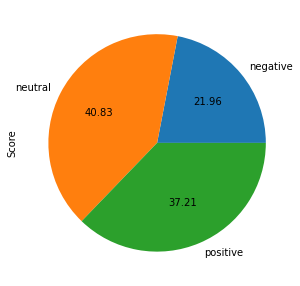

In [49]:

Cleaned_tweets.groupby('Score')['Score'].count().plot.pie(autopct='%.2f',figsize=(5,5))

<AxesSubplot:xlabel='Score'>

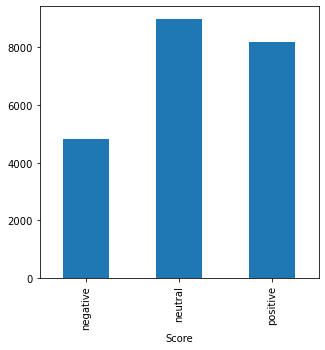

In [50]:
Cleaned_tweets.groupby('Score')['Score'].count().plot.bar(figsize=(5,5))

In [54]:
indexx = []
for i in range(len(Cleaned_tweets)):
    if Cleaned_tweets['Score'][i] == 'neutral':
        indexx.append(i)
Cleaned_tweets = Cleaned_tweets.drop(indexx)      
Cleaned_tweets= Cleaned_tweets.reset_index(drop=True)

In [55]:
Cleaned_tweets

,Clean_text,Polarity,Score
0,Extra random image (I): Lets focus in one very...,-1.250000e-01,negative
1,China's media explains the military reasons fo...,-1.000000e-01,negative
2,"Putin to XiJinping : I told you my friend, Tai...",1.000000e-01,positive
3,"I’m sorry, I thought Taiwan was an independent...",-6.938894e-18,negative
4,We must not let this happen. We must be ready....,2.000000e-01,positive
...,...,...,...
13013,A good infographic of China's missile launches...,7.000000e-01,positive
13014,A good infographic of China's missile launches...,7.000000e-01,positive
13015,Thanks Pelosi smart move.,2.071429e-01,positive
13016,Taiwan people's Desire for Unification With Ch...,5.000000e-02,positive


In [56]:
newscore = []
for i in Cleaned_tweets['Score']:
    if i == 'negative':
        newscore.append(0)
    else:
        newscore.append(1)
        
Cleaned_tweets['Score'] = newscore

In [57]:
Cleaned_tweets

,Clean_text,Polarity,Score
0,Extra random image (I): Lets focus in one very...,-1.250000e-01,0
1,China's media explains the military reasons fo...,-1.000000e-01,0
2,"Putin to XiJinping : I told you my friend, Tai...",1.000000e-01,1
3,"I’m sorry, I thought Taiwan was an independent...",-6.938894e-18,0
4,We must not let this happen. We must be ready....,2.000000e-01,1
...,...,...,...
13013,A good infographic of China's missile launches...,7.000000e-01,1
13014,A good infographic of China's missile launches...,7.000000e-01,1
13015,Thanks Pelosi smart move.,2.071429e-01,1
13016,Taiwan people's Desire for Unification With Ch...,5.000000e-02,1


In [58]:
y = Cleaned_tweets['Score']
X = Cleaned_tweets['Clean_text']

In [59]:
X

0        Extra random image (I): Lets focus in one very...
1        China's media explains the military reasons fo...
2        Putin to XiJinping : I told you my friend, Tai...
3        I’m sorry, I thought Taiwan was an independent...
4        We must not let this happen. We must be ready....
                               ...                        
13013    A good infographic of China's missile launches...
13014    A good infographic of China's missile launches...
13015                            Thanks Pelosi smart move.
13016    Taiwan people's Desire for Unification With Ch...
13017    Taiwan people's Desire for Unification With Ch...
Name: Clean_text, Length: 13018, dtype: object

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


cv = CountVectorizer()
X_traincv = cv.fit_transform(X)
nnnx = X_traincv.toarray()
X_train, X_test, y_train, y_test = train_test_split(nnnx, y, test_size=0.33, random_state=42)
len(X_train)


8722

In [62]:
clf = SGDClassifier(max_iter=1000, tol=1e-3)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('sgdclassifier', SGDClassifier())])
clf.fit(X_train,y_train)

SGDClassifier()

In [63]:
predicted_score = clf.predict(X_test)

In [64]:
accuracytable = pd.DataFrame()
accuracytable['actual'] = y_test
accuracytable['pred'] = predicted_score 

In [65]:
accuracytable

,actual,pred
811,0,0
5945,1,1
353,1,1
3409,1,1
4900,1,1
...,...,...
2423,1,1
7074,0,1
5277,1,1
7242,0,0


In [66]:
f'{100*clf.score(X_test,y_test)}% Accuracy'

'95.2048417132216% Accuracy'